# NFL Elimination Picks 2024

reqs:
```
pip install requests numpy scipy pandas matplotlib parsel
```

In [1]:
import datetime
import math
import random

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#%load_ext autoreload
#%autoreload 2

In [3]:
import anysunday
import anysunday.powercalcs
from anysunday import viz, pick

In [4]:
schedule = anysunday.loaders.espn_schedule("./schedules/2024.espn")

https://www.espn.com/nfl/fpi

In [5]:
powers = anysunday.loaders.espn_powers()
powers

{'SF': 5.3,
 'KC': 4.6,
 'DET': 4.2,
 'BAL': 3.6,
 'PHI': 3.6,
 'BUF': 3.2,
 'HOU': 2.7,
 'GB': 2.7,
 'DAL': 2.6,
 'CIN': 2.5,
 'MIA': 2.2,
 'NYJ': 1.7,
 'LAR': 1.3,
 'CLE': 0.5,
 'CHI': 0.4,
 'ATL': 0.3,
 'JAX': 0.0,
 'SEA': -0.2,
 'LAC': -0.2,
 'PIT': -0.4,
 'IND': -0.9,
 'TB': -1.4,
 'ARI': -1.9,
 'MIN': -2.1,
 'NO': -2.4,
 'LV': -3.2,
 'TEN': -3.3,
 'NYG': -4.1,
 'WSH': -4.1,
 'DEN': -4.7,
 'NE': -5.6,
 'CAR': -6.1}

In [6]:
top_picks = list(powers)[:len(schedule)]
best_pick = None
best_pick_fitness = -100

def fitness(scores):
    return 100 * min(scores) + sum(scores)

def fitness(scores):
    return 50 * (min(scores) - 3) + sum(scores)

picks = []

HOME_POWER_BUMP = 3.0

for n in range(1_000_000):
    this_pick = top_picks[:]
    random.shuffle(this_pick)
    try:
        scores = anysunday.powercalcs.pick_power_calculator(powers, schedule, this_pick)
    except ValueError:
        continue
    
    pick_fitness = fitness(scores)
    
    if pick_fitness < 0:
        continue

    picks.append([min(scores), sum(scores)])
    
    if pick_fitness < best_pick_fitness:
        continue
    
    print("new high score, round {:>9d}, fitness={:+3.1f}".format(n, pick_fitness))
    best_pick = this_pick
    best_scores = scores
    best_pick_fitness = pick_fitness


new high score, round     46372, fitness=+10.2
new high score, round    210812, fitness=+15.5
new high score, round    234730, fitness=+36.4
new high score, round    442533, fitness=+59.6


In [7]:
anysunday.powercalcs.pick_power_calculator(powers, schedule, best_pick, verbose=True)

week  1: diff  +6.6 - picking SF  (+5.3+H) over NYJ (+1.7  )
week  2: diff  +2.0 - picking NYJ (+1.7  ) over TEN (-3.3+H)
week  3: diff  +3.1 - picking DET (+4.2  ) over ARI (-1.9+H)
week  4: diff  +7.8 - picking GB  (+2.7+H) over MIN (-2.1  )
week  5: diff  +6.9 - picking SEA (-0.2+H) over NYG (-4.1  )
week  6: diff  +5.3 - picking HOU (+2.7  ) over NE  (-5.6+H)
week  7: diff  +8.6 - picking JAX (+0.0+H) over NE  (-5.6  )
week  8: diff  +4.8 - picking KC  (+4.6  ) over LV  (-3.2+H)
week  9: diff  +3.7 - picking CLE (+0.5+H) over LAC (-0.2  )
week 10: diff  +4.1 - picking BAL (+3.6+H) over CIN (+2.5  )
week 11: diff  +3.9 - picking LAR (+1.3  ) over NE  (-5.6+H)
week 12: diff +10.8 - picking MIA (+2.2+H) over NE  (-5.6  )
week 13: diff  +9.7 - picking DAL (+2.6+H) over NYG (-4.1  )
week 14: diff +12.7 - picking PHI (+3.6+H) over CAR (-6.1  )
week 15: diff  +2.8 - picking CIN (+2.5  ) over TEN (-3.3+H)
week 16: diff  +7.4 - picking ATL (+0.3+H) over NYG (-4.1  )
week 17: diff  +3.6 - pi

[6.6,
 2.0,
 3.0999999999999996,
 7.800000000000001,
 6.8999999999999995,
 5.300000000000001,
 8.6,
 4.8,
 3.7,
 4.1,
 3.8999999999999995,
 10.8,
 9.7,
 12.7,
 2.8,
 7.3999999999999995,
 3.6,
 5.800000000000001]

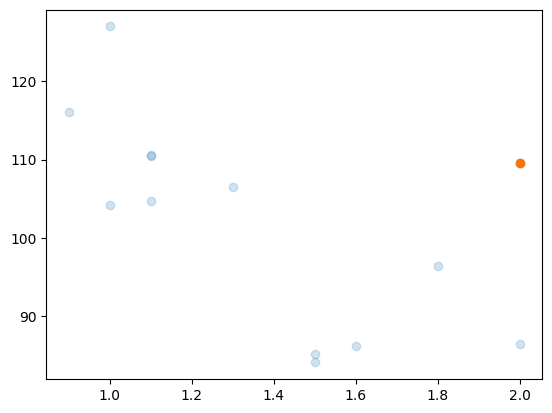

In [8]:
best_scores = anysunday.powercalcs.pick_power_calculator(powers, schedule, best_pick)
best_point = [min(best_scores), sum(best_scores)]

f, ax = plt.subplots()
ax.scatter(*zip(*picks), alpha=0.2)

ax.scatter(*best_point, color="xkcd:orange")

(<Figure size 800x1000 with 2 Axes>,
 <Axes: xlabel='Week', ylabel='Pick to Win'>)

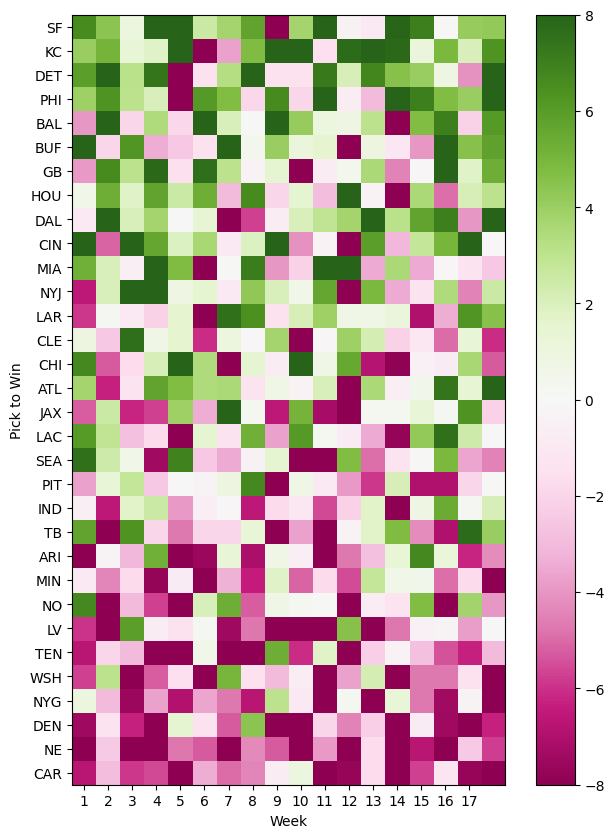

In [9]:
power_rank, matrix = anysunday.powercalcs.pick_grid(powers, schedule, home_bump=3)

viz.plot_matrix(matrix, power_rank)

In [18]:
my_past_picks = [
    # "BUF", # week 1
]

tuned_home_bump = 3

ppkwargs = {
    "powers": powers,
    "schedule": schedule,
    "home_bump": tuned_home_bump,
    "past_picks": my_past_picks
}

In [19]:
pp = pick.Permuter(**ppkwargs)

pprev = pick.Permuter(**ppkwargs)
pprev.pick = pprev.reverse_greedy()

pprand = pick.Permuter(**ppkwargs)
pprand.pick = pprand.random_greedy()

pplg = pick.Permuter(**ppkwargs)
pplg.pick = pplg.limited_greedy(limit=8)

In [20]:
pp.describe_pick()

week  1: diff +11.1 - picking CIN (+2.5+H) over NE  (-5.6  )
week  2: diff  +9.8 - picking BAL (+3.6+H) over LV  (-3.2  )
week  3: diff +10.3 - picking NYJ (+1.7+H) over NE  (-5.6  )
week  4: diff +13.9 - picking SF  (+5.3+H) over NE  (-5.6  )
week  5: diff +10.0 - picking KC  (+4.6+H) over NO  (-2.4  )
week  6: diff  +7.6 - picking GB  (+2.7+H) over ARI (-1.9  )
week  7: diff  +9.5 - picking BUF (+3.2+H) over TEN (-3.3  )
week  8: diff +10.5 - picking DET (+4.2+H) over TEN (-3.3  )
week  9: diff  +6.6 - picking PHI (+3.6+H) over JAX (+0.0  )
week 10: diff  +9.0 - picking CHI (+0.4+H) over NE  (-5.6  )
week 11: diff  +8.4 - picking MIA (+2.2+H) over LV  (-3.2  )
week 12: diff  +9.0 - picking HOU (+2.7+H) over TEN (-3.3  )
week 13: diff  +9.7 - picking DAL (+2.6+H) over NYG (-4.1  )
week 14: diff  +4.8 - picking TB  (-1.4+H) over LV  (-3.2  )
week 15: diff  +6.7 - picking ARI (-1.9+H) over NE  (-5.6  )
week 16: diff  +7.5 - picking LAC (-0.2+H) over DEN (-4.7  )
week 17: diff  +6.3 - pi

In [21]:
pprev.describe_pick()

week  1: diff  +6.7 - picking NO  (-2.4+H) over CAR (-6.1  )
week  2: diff  +5.3 - picking HOU (+2.7+H) over CHI (+0.4  )
week  3: diff  +7.6 - picking CLE (+0.5+H) over NYG (-4.1  )
week  4: diff  +9.4 - picking NYJ (+1.7+H) over DEN (-4.7  )
week  5: diff  +6.9 - picking SEA (-0.2+H) over NYG (-4.1  )
week  6: diff  +7.6 - picking GB  (+2.7+H) over ARI (-1.9  )
week  7: diff  +8.6 - picking JAX (+0.0+H) over NE  (-5.6  )
week  8: diff  +6.7 - picking PIT (-0.4+H) over NYG (-4.1  )
week  9: diff +11.3 - picking BAL (+3.6+H) over DEN (-4.7  )
week 10: diff  +9.0 - picking CHI (+0.4+H) over NE  (-5.6  )
week 11: diff  +7.2 - picking DET (+4.2+H) over JAX (+0.0  )
week 12: diff +10.8 - picking MIA (+2.2+H) over NE  (-5.6  )
week 13: diff  +9.7 - picking DAL (+2.6+H) over NYG (-4.1  )
week 14: diff  +7.8 - picking KC  (+4.6+H) over LAC (-0.2  )
week 15: diff  +7.0 - picking SF  (+5.3+H) over LAR (+1.3  )
week 16: diff +11.8 - picking BUF (+3.2+H) over NE  (-5.6  )
week 17: diff +10.2 - pi

In [22]:
pprand.describe_pick()

week  1: diff +11.1 - picking CIN (+2.5+H) over NE  (-5.6  )
week  2: diff  +8.6 - picking DET (+4.2+H) over TB  (-1.4  )
week  3: diff +10.3 - picking NYJ (+1.7+H) over NE  (-5.6  )
week  4: diff  +5.7 - picking HOU (+2.7+H) over JAX (+0.0  )
week  5: diff  +6.9 - picking SEA (-0.2+H) over NYG (-4.1  )
week  6: diff  +7.6 - picking GB  (+2.7+H) over ARI (-1.9  )
week  7: diff  +9.5 - picking BUF (+3.2+H) over TEN (-3.3  )
week  8: diff  +6.7 - picking PIT (-0.4+H) over NYG (-4.1  )
week  9: diff +11.3 - picking BAL (+3.6+H) over DEN (-4.7  )
week 10: diff  +9.0 - picking CHI (+0.4+H) over NE  (-5.6  )
week 11: diff  +3.9 - picking LAR (+1.3  ) over NE  (-5.6+H)
week 12: diff +10.8 - picking MIA (+2.2+H) over NE  (-5.6  )
week 13: diff  +9.7 - picking DAL (+2.6+H) over NYG (-4.1  )
week 14: diff  +7.8 - picking KC  (+4.6+H) over LAC (-0.2  )
week 15: diff  +7.0 - picking SF  (+5.3+H) over LAR (+1.3  )
week 16: diff  +7.5 - picking LAC (-0.2+H) over DEN (-4.7  )
week 17: diff  +7.7 - pi

In [23]:
pplg.describe_pick()

week  1: diff  +8.1 - picking BUF (+3.2+H) over ARI (-1.9  )
week  2: diff  +8.6 - picking DET (+4.2+H) over TB  (-1.4  )
week  3: diff  +9.6 - picking CIN (+2.5+H) over WSH (-4.1  )
week  4: diff  +8.5 - picking MIA (+2.2+H) over TEN (-3.3  )
week  5: diff  +9.5 - picking CHI (+0.4+H) over CAR (-6.1  )
week  6: diff +10.7 - picking BAL (+3.6+H) over WSH (-4.1  )
week  7: diff  +8.6 - picking JAX (+0.0+H) over NE  (-5.6  )
week  8: diff  +6.7 - picking PIT (-0.4+H) over NYG (-4.1  )
week  9: diff  +9.0 - picking KC  (+4.6+H) over TB  (-1.4  )
week 10: diff  +6.1 - picking LAC (-0.2+H) over TEN (-3.3  )
week 11: diff  +8.5 - picking SF  (+5.3+H) over SEA (-0.2  )
week 12: diff  +9.0 - picking HOU (+2.7+H) over TEN (-3.3  )
week 13: diff  +9.7 - picking DAL (+2.6+H) over NYG (-4.1  )
week 14: diff +12.7 - picking PHI (+3.6+H) over CAR (-6.1  )
week 15: diff  +6.7 - picking ARI (-1.9+H) over NE  (-5.6  )
week 16: diff  +8.1 - picking GB  (+2.7+H) over NO  (-2.4  )
week 17: diff  +7.7 - pi

In [ ]:
import contextlib
import ctypes
import multiprocessing
import queue
import time

In [ ]:
def check_until_when(done_flag, best_q, trial_counter=None, permuter=None, method_name="random_greedy"):
    global ppkwargs
    if permuter is None:
        permuter = pick.Permuter(**ppkwargs)

    best_picks = []
    best_fitness = -100
    trials = 0
    while not done_flag.is_set():
        permuter.pick = getattr(permuter, method_name)()

        if permuter.fitness > best_fitness:
            best_picks = permuter.pick
            best_fitness = permuter.fitness
            best_q.put((best_picks, best_fitness))
        trials += 1
        
    if trial_counter is not None:
        with trial_counter.get_lock():
            trial_counter.value += trials
    return trials

In [ ]:
class TestFlag:
    def __init__(self, n_checks=1000):
        self.remaining = n_checks
    def is_set(self):
        self.remaining -= 1
        return self.remaining <= 0
        
test_q = queue.Queue()
start = time.monotonic()
trials = check_until_when(TestFlag(40_000), test_q)
elapsed = time.monotonic() - start
print(f"{trials/elapsed/1000:0.3f}k trials/sec over {elapsed:0.3f} sec")

In [ ]:
proc_time = 60  # desired processing time
n_proc = 24

best_picks = []
best_fitness = -100

done_flag = multiprocessing.Event()
new_best_q = multiprocessing.Queue()
trial_counter = multiprocessing.Value(ctypes.c_long, 0)
processes = [
    multiprocessing.Process(target=check_until_when, args=(done_flag, new_best_q, trial_counter))
    for n
    in range(n_proc)
]

for p in processes:
    p.start()
    
start = time.monotonic()
elapsed = 0
while (elapsed < proc_time) or not new_best_q.empty:
    elapsed = time.monotonic() - start
    if elapsed >= proc_time:
        done_flag.set()
        for p in processes:
            p.join()

    try:
        proc_best_picks, proc_best_fitness = new_best_q.get(timeout=0.1)
        if proc_best_fitness > best_fitness:
            best_picks, best_fitness = proc_best_picks, proc_best_fitness
            # elide already picked picks
            if my_past_picks:
                best_picks = ["..."] + best_picks[len(my_past_picks):]
            print(f"New best {best_fitness/1000:6.1f}k, via: {', '.join(best_picks)}")
    except queue.Empty:
        pass
                
print(f"Tried {trial_counter.value:,d} permutations in {elapsed:0.1f} sec "
      f"({trial_counter.value/elapsed/1000:0.3f}k/sec, {trial_counter.value/elapsed/n_proc/1000:0.3f}k/sec/worker)")

## FiveThirtyEight Elo Data

* Links
    * https://projects.fivethirtyeight.com/2022-nfl-predictions/
    * https://github.com/fivethirtyeight/data/tree/master/nfl-elo
* Important Fields
    * `team1`	Abbreviation for home team
    * `team2`	Abbreviation for away team
    * `qbelo_prob1`	Home team's probability of winning according to quarterback-adjusted Elo
    * `qbelo_prob2`	Away team's probability of winning according to quarterback-adjusted Elo

In [ ]:
data = anysunday.loaders.five38_elos()

In [ ]:
data.shape

In [ ]:
data

In [ ]:
import dateutil.parser

NUM_TEAMS = 32
NUM_WEEKS = len(schedule)

WEEK_1_WED = datetime.datetime(year=2022, month=9, day=7)
TEAM_RENAMES = {
    "OAK": "LV",  # Raiders
}

def date_to_week(date):
    if not isinstance(date, datetime.datetime):
        date = dateutil.parser.parse(date)
    day_diff = (date - WEEK_1_WED) / datetime.timedelta(days=1)
    return int((day_diff // 7) + 1)

def pick_grid_538(data):
    powers = {}
    matches = []
    for _index, row in data.iterrows():
        week = date_to_week(row["date"])
        if week > NUM_WEEKS: 
            break
        for n in "12":
            team = row[f"team{n}"]
            elo = row[f"qbelo{n}_post"]
            p_win = row[f"qbelo_prob{n}"]
            if not math.isnan(elo):
                powers[team] = elo
            matches.append((team, week, p_win))

    index = sorted(powers, key=lambda t: powers[t])
    matrix = [[-10] * NUM_TEAMS for _ in range(NUM_WEEKS)]
    for team, week, p_win in matches:
        matrix[week - 1][index.index(team)] = 20 * (p_win - 0.5)
    
    # 538 uses old names as they have historical(ish) data
    index = [TEAM_RENAMES.get(n, n) for n in index]
    return index, matrix

In [ ]:
index538, matrix538 = pick_grid_538(data)
viz.plot_matrix(matrix538, index538)

In [ ]:
class ProbPickPermuter(pick.Permuter):
    def __init__(self, df, past_picks=None):
        self.past_picks = past_picks or []
        self.n_weeks = NUM_WEEKS

        self.df = df.copy()
        self.df["week"] = self.df["date"].apply(date_to_week)
        
        # ignore postseason games
        self.df = self.df[self.df["week"] <= NUM_WEEKS]
    
        self.grid_index, self.grid = pick_grid_538(self.df)
        
        self.pick = self.greedy()
        
    @property
    def pick_score(self):
        scores = []
        for week in range(NUM_WEEKS):
            pick = self.pick[week]
            pick_index = self.grid_index.index(pick)
            scores.append(self.grid[week][pick_index])
        return scores

In [ ]:
ppp = ProbPickPermuter(data, past_picks=my_past_picks)
ppp.pick = ppp.greedy()
ppp.fitness

In [ ]:
ppp = ProbPickPermuter(data, past_picks=my_past_picks)

best_538_picks = []
best_538_fitness = -100
for n in range(100_000):
    ppp.pick = ppp.random_greedy()
    
    if ppp.fitness > best_538_fitness:
        print("new best fitness", int(ppp.fitness))
        best_538_picks = ppp.pick
        print(" ".join(format(p, ">3s") for p in best_538_picks))
        best_538_fitness = ppp.fitness
        
ppp.pick = best_538_picks
ppp.pick 

In [ ]:
proc_time = 60  # desired processing time
n_proc = 24

best_picks = []
best_fitness = -100

done_flag = multiprocessing.Event()
new_best_q = multiprocessing.Queue()
trial_counter = multiprocessing.Value(ctypes.c_long, 0)
processes = [
    multiprocessing.Process(target=check_until_when, args=(
        done_flag, new_best_q, trial_counter, ProbPickPermuter(data, past_picks=my_past_picks),
    ))
    for n
    in range(n_proc)
]

for p in processes:
    p.start()
    
start = time.monotonic()
elapsed = 0
while (elapsed < proc_time) or not new_best_q.empty:
    elapsed = time.monotonic() - start
    if elapsed >= proc_time:
        done_flag.set()
        for p in processes:
            p.join()

    try:
        proc_best_picks, proc_best_fitness = new_best_q.get(timeout=0.1)
        if proc_best_fitness > best_fitness:
            best_picks, best_fitness = proc_best_picks, proc_best_fitness
            # elide already picked picks
            if my_past_picks:
                best_picks = ["..."] + best_picks[len(my_past_picks):]
            print(f"New best {best_fitness/1000:6.1f}k, via: {', '.join(best_picks)}")
    except queue.Empty:
        pass
                
print(f"Tried {trial_counter.value:,d} permutations in {elapsed:0.1f} sec "
      f"({trial_counter.value/elapsed/1000:0.3f}k/sec, {trial_counter.value/elapsed/n_proc/1000:0.3f}k/sec/worker)")

In [ ]:
# print(" ".join(format(n+1, ">3d") for n in range(len(pprand.pick))))
# print(" ".join(format(p, ">3s") for p in pprand.pick))
# print(" ".join(format(p, ">3s") for p in best_538_picks))